In [33]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read image 
original= cv2.imread('/content/img1.jpg')
duplicate  = cv2.imread('/content/img1.jpg')  


# Compare and find similarities between two images when they’re similar but not exactly identical.

In [34]:
sift = cv2.xfeatures2d.SIFT_create()
kp_1, desc_1 = sift.detectAndCompute(original, None)
kp_2, desc_2 = sift.detectAndCompute(duplicate, None)

find the matches between the 2 images. We’re storing the matches in the array ‘matches’.

The array will contain all possible matches, so many false matches as well.

In [35]:
index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(desc_1, desc_2, k=2)

we apply the ratio test to select only the good matches.

By applying the ratio test we can decide to take only the matches with lower distance, so higher quality.

If you decrease the ratio value, for example to 0.1 you will get really high quality matches, but the downside is that you will get only few matches.

If you increase it you will get more matches but sometimes many false ones.


In [36]:
good_points = []
ratio = 0.6
for m, n in matches:
    if m.distance < ratio*n.distance:
        good_points.append(m)
        print(len(good_points))
result = cv2.drawMatches(original, kp_1, duplicate, kp_2, good_points, None)

Streaming output truncated to the last 5000 lines.
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804

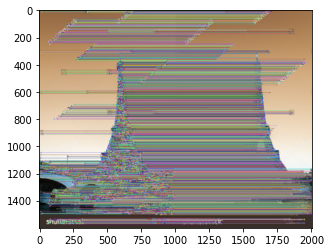

In [37]:
 plt.imshow(result)

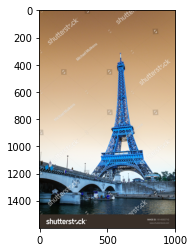

In [38]:
 plt.imshow(original)


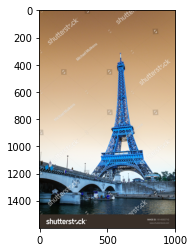

In [39]:
 plt.imshow(duplicate)

In [40]:
# Define how similar they are
number_keypoints = 0
if len(kp_1) <= len(kp_2):
    number_keypoints = len(kp_1)
else:
    number_keypoints = len(kp_2)
print("Keypoints 1ST Image: " + str(len(kp_1)))
print("Keypoints 2ND Image: " + str(len(kp_2)))

Keypoints 1ST Image: 7614
Keypoints 2ND Image: 7614


we divide the good matches by the number of keypoints. We will get a number between 0 (if there were no matches at all) and 1 (if all keypoints were a match) and then we multiply them by 100 to have a percentage score.

In [41]:
print("GOOD Matches:", len(good_points))
print("How good it's the match: ", len(good_points) / number_keypoints * 100, "%")

GOOD Matches: 7614
How good it's the match:  100.0 %
